## Data Wrangling

In [1]:
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import missingno as msno
import numpy as np
import pandas as pd
import ppscore as pps
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

C:\Users\sit_k\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
gender = pd.read_csv('./data/age_gender_bkts.csv')
train = pd.read_csv('./data/train_users_2.csv')
test = pd.read_csv('./data/test_users.csv')
country = pd.read_csv('./data/countries.csv')
session = pd.read_csv('./data/sessions.csv')
age_gender = pd.read_csv('./data/age_gender_bkts.csv')

In [3]:
print(gender.shape)
print(gender.info())
display(gender.tail())

(420, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB
None


,age_bucket,country_destination,gender,population_in_thousands,year
415,95-99,US,male,115.0,2015.0
416,90-94,US,male,541.0,2015.0
417,15-19,US,female,10570.0,2015.0
418,85-89,US,male,1441.0,2015.0
419,80-84,US,male,2442.0,2015.0


In [4]:
gender['age_bucket'].unique()

array(['100+', '95-99', '90-94', '85-89', '80-84', '75-79', '70-74',
       '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '35-39',
       '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4'],
      dtype=object)

In [5]:
print(country.shape)
print(country.info())
display(country)

(10, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_destination            10 non-null     object 
 1   lat_destination                10 non-null     float64
 2   lng_destination                10 non-null     float64
 3   distance_km                    10 non-null     float64
 4   destination_km2                10 non-null     float64
 5   destination_language           10 non-null     object 
 6   language_levenshtein_distance  10 non-null     float64
dtypes: float64(5), object(2)
memory usage: 688.0+ bytes
None


,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [6]:
print(age_gender.shape)
print(age_gender.info())
display(age_gender)

(420, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB
None


,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
...,...,...,...,...,...
415,95-99,US,male,115.0,2015.0
416,90-94,US,male,541.0,2015.0
417,15-19,US,female,10570.0,2015.0
418,85-89,US,male,1441.0,2015.0


In [7]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [8]:
display(session.shape)

(10567737, 6)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62096 non-null  object 
 1   date_account_created     62096 non-null  object 
 2   timestamp_first_active   62096 non-null  int64  
 3   date_first_booking       0 non-null      float64
 4   gender                   62096 non-null  object 
 5   age                      33220 non-null  float64
 6   signup_method            62096 non-null  object 
 7   signup_flow              62096 non-null  int64  
 8   language                 62096 non-null  object 
 9   affiliate_channel        62096 non-null  object 
 10  affiliate_provider       62096 non-null  object 
 11  first_affiliate_tracked  62076 non-null  object 
 12  signup_app               62096 non-null  object 
 13  first_device_type        62096 non-null  object 
 14  first_browser         

In [11]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


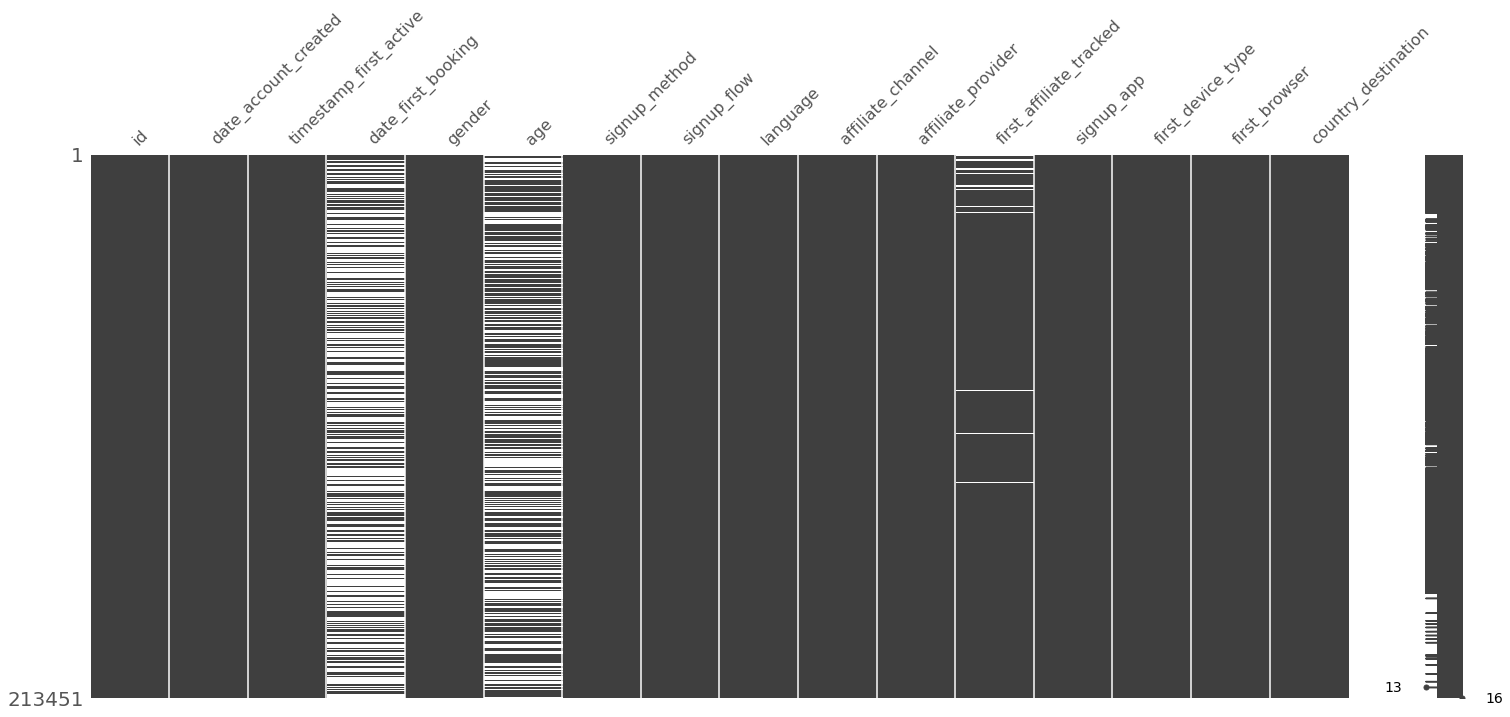

In [12]:
msno.matrix(train);

In [13]:
train['age'].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

### Cleaning steps needed:
- convert all date/time related columns into datetime
- deal with missing age and through assigning new variables and binning
- filling first_affiliate_tracked missing value with new category value "missing"

#### Time

In [14]:
train['date_account_created'] = pd.to_datetime(
    train['date_account_created'], format='%Y-%m-%d', errors='coerce')
train['date_account_created'] = pd.to_datetime(
    train['date_account_created'], format='%Y-%m-%d', errors='coerce')
train['date_first_booking'] = pd.to_datetime(
    train['date_first_booking'], format='%Y-%m-%d', errors='coerce')
train['timestamp_first_active'] = pd.to_datetime(
    train['timestamp_first_active'], format='%Y%m%d%H%M%S', errors='coerce')

#### Age

In [15]:
# for missing value, assign -1 as the age value
train['age_fill'] = train['age'].apply(
    lambda x: -1 if x > 1000 else x).fillna(-1)

In [16]:
train['age_fill'].describe()

count    213451.000000
mean         21.438293
std          21.731754
min          -1.000000
25%          -1.000000
50%          26.000000
75%          35.000000
max         150.000000
Name: age_fill, dtype: float64

#### First Affiliate tracked

In [17]:
train['first_affiliate_tracked'].value_counts(dropna=False)

untracked        109232
linked            46287
omg               43982
tracked-other      6156
NaN                6065
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

The missing count is at 6000 thousands, which is still a relatively big number. Not knowing the reason of the miss, we will create a new category called "miss" treat that as a real category

In [18]:
train['first_affiliate_tracked'].fillna('miss', inplace=True)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null   datetime64[ns]
 4   gender                   213451 non-null  object        
 5   age                      125461 non-null  float64       
 6   signup_method            213451 non-null  object        
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  object        
 9   affiliate_channel        213451 non-null  object        
 10  affiliate_provider       213451 non-null  object        
 11  first_affiliate_tracked  213451 non-null  object        
 12  signup_app      

## Data Exploratory

In this section, we are trying to identify variables within the train dataset, then we will dive in to session dataset to understand browsing pattern.

We first want to create a simple binary variable "book" that take value 1 if booking occur, 0 otherwise.

In [20]:
# replace all missing values to 0 then assign 1 for rows that have booking dates
train['book'] = train['date_first_booking'].fillna(
    0).apply(lambda x: 0 if x == 0 else 1)

### Age Group

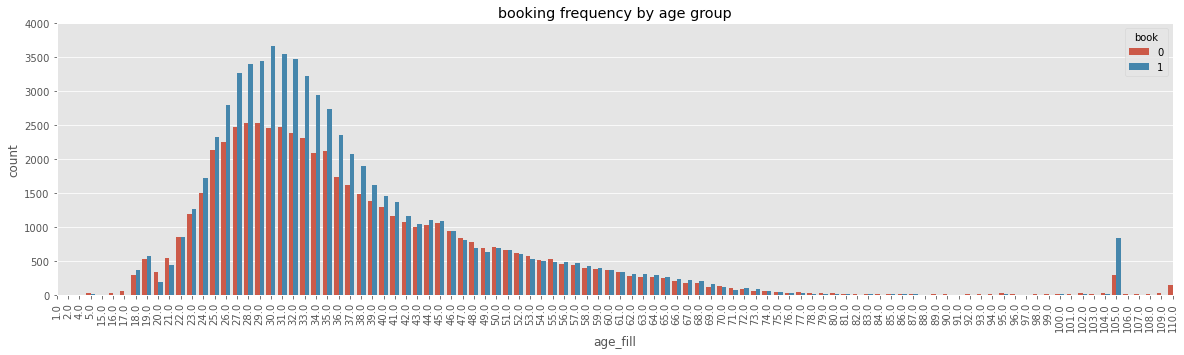

In [21]:
# checking age as function booking frequency
plt.figure(figsize=(20, 5))
ax = sns.countplot(x='age_fill', hue='book', data=train)
plt.title('booking frequency by age group')
plt.xticks(rotation=90)
plt.xlim(1, 100)
plt.ylim(0, 4000)
plt.show()

**Observation**: age group between 25 to 35 appear to have the most booking, and they are also the mainstream user groups. Interesting to see spike in age group 105, which is likely to be driven by factor other than age. 

We can apply binning to the age by an interval of 5 as provided by the gender dataset.

In [22]:
age_cat = age_gender['age_bucket'].unique().tolist()
age_sort = age_cat[::-1]
age_sort.insert(0, 'miss')

In [23]:
train['age_gp'] = pd.cut(
    train['age_fill'], bins=np.arange(-5, 106, 5), labels=age_sort)

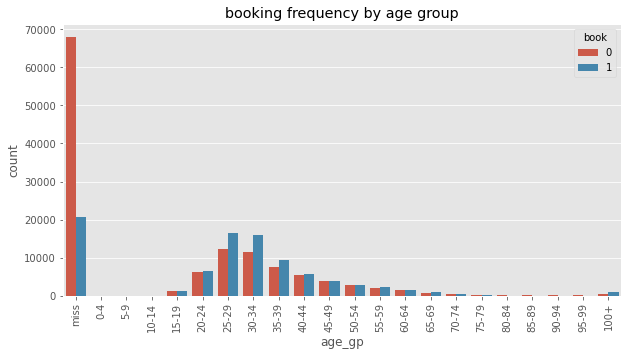

In [24]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='age_gp', hue='book', data=train)
plt.title('booking frequency by age group')
plt.xticks(rotation=90)
plt.show()

##### Check other features one by one, create custom function below to streamline the process

In [25]:
def visual_plot(x):
    cross_tab = pd.crosstab(train[x], columns=train.book, margins=True)
    cross_tab.columns.name = None
    cross_tab['book_rate'] = cross_tab[1]/cross_tab['All']
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,5))
    sns.barplot(x=cross_tab.index, y='book_rate', data=cross_tab, color='grey', ax=ax1)
    ax1.set_title('booking frequency based on {}'.format(x))
    ax1.set(xlabel = None, ylabel ='booking_rate')
    ax1.set_xticklabels(cross_tab.index, rotation=90)
    sns.barplot(x=cross_tab.index, y='All', data=cross_tab, color='grey', ax=ax2)
    ax2.set(xlabel = None, ylabel ='count')
    ax2.set_title('number of records')
    ax2.set_xticklabels(cross_tab.index, rotation=90)
    plt.tight_layout()
    plt.show()

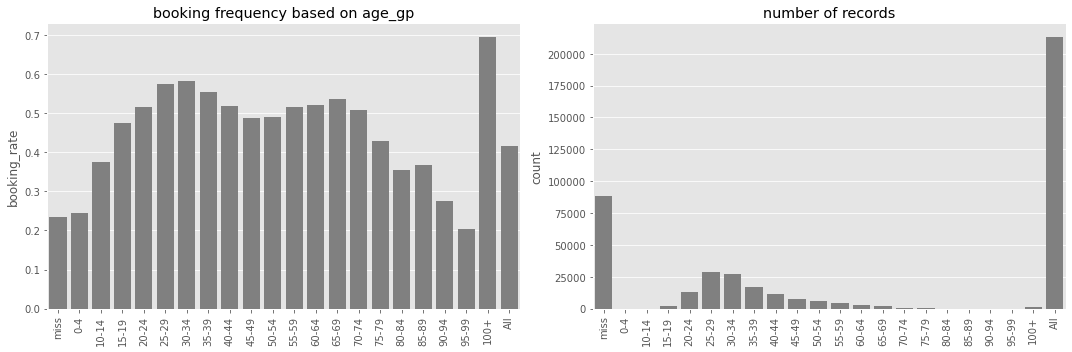

In [26]:
visual_plot('age_gp')

### Language

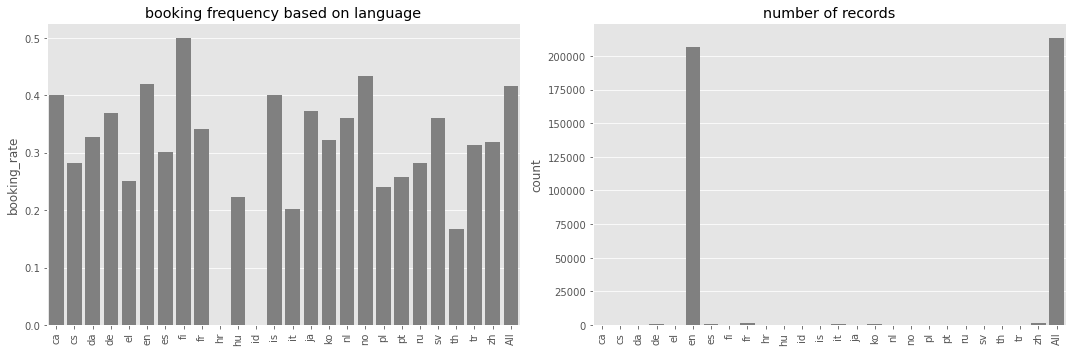

In [27]:
visual_plot('language')

**Observation**: English us the main language used on the platform. Given data are imbalance across languages other than English, we will consolidate languages into smaller categories in hope of increase the predictive power of this variable.

In [28]:
lang = {'en': 'eng',
        'zh': 'asia',
        'ko': 'asia',
        'ja': 'asia',
        'fr': 'eu',
        'es': 'eu',
        'de': 'eu',
        'ru': 'eu',
        'pt': 'eu'}

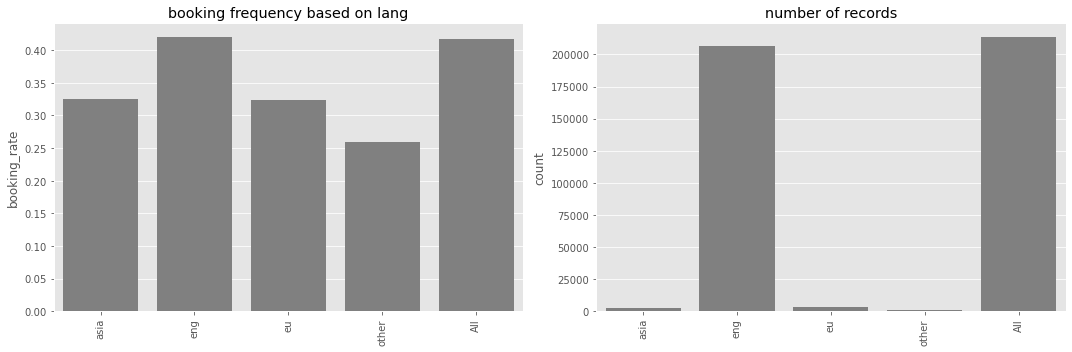

In [29]:
train['lang'] = train['language'].map(lang).fillna('other')
visual_plot('lang')

### Browser

In [30]:
# consolidate browser type to reduce the number categories
browser = {'Chrome': 'chrome',
           'Chrome Mobile': 'chrome',
           'Safari': 'safari',
           'Mobile Safari': 'safari',
           'Firefox': 'firefox',
           'Mobile Firefox': 'firefox',
           'IE': 'ie',
           'IE Mobile': 'ie',
           '-unknown-': 'unknown'}

In [31]:
train['browser'] = train['first_browser'].map(browser).fillna('other')

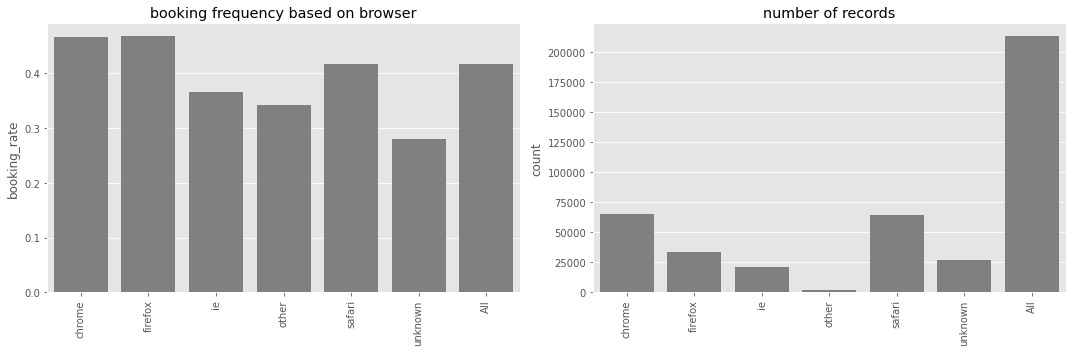

In [32]:
visual_plot('browser')

**Observation**: Chrome and FireFox appear to have higher booking rate than IE and Safari. It could be a useful features.

### Signup method, app and flow

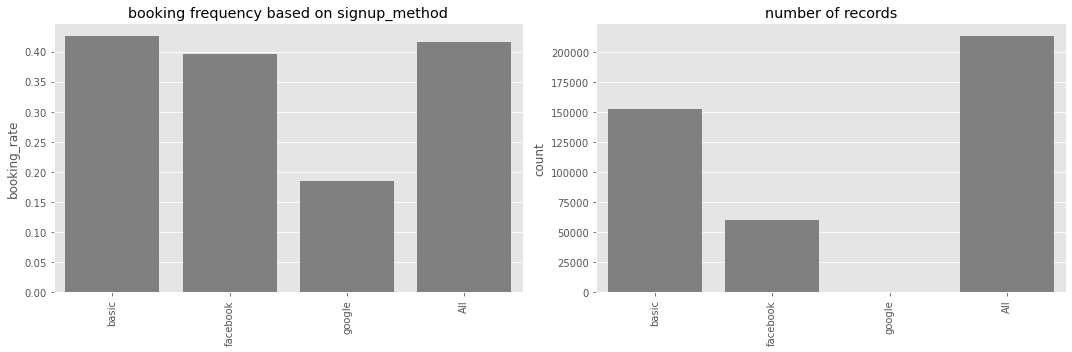

In [33]:
visual_plot('signup_method')

**Observation**: Google signup method has the lowest booking rate.

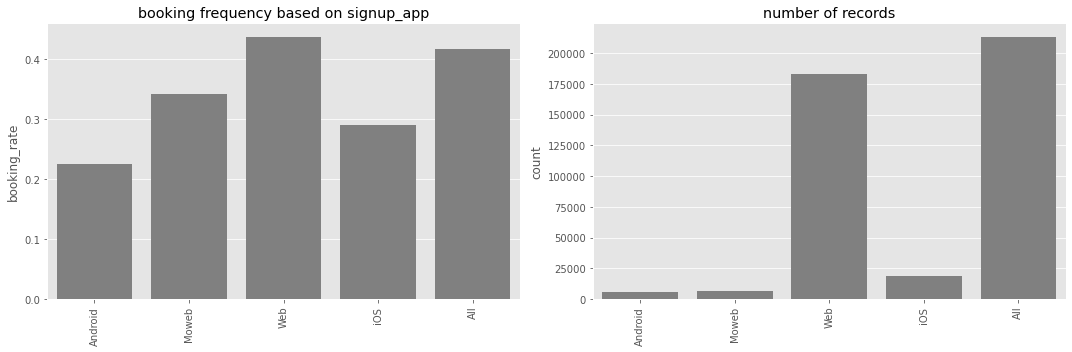

In [34]:
visual_plot('signup_app')

**Observation**: Web has the highest booking rate

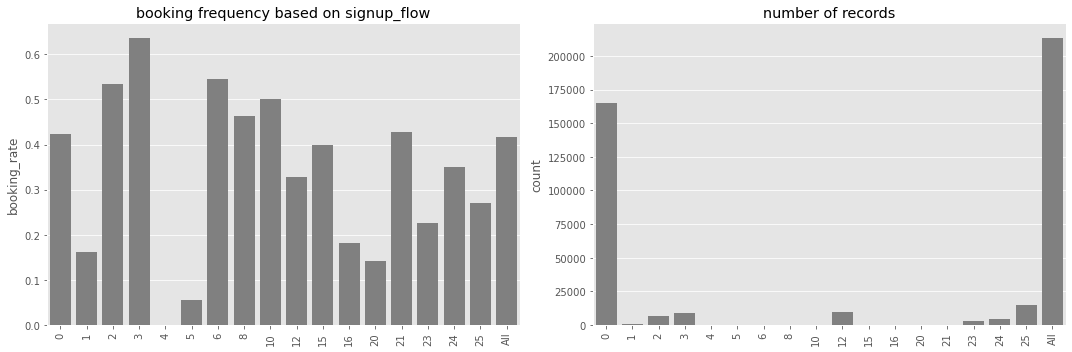

In [35]:
visual_plot('signup_flow')

**Observation**: booking rate appear to be the highest when the number of page visit is either 0, 12 or above 23. 0 pages users probably already know what they want and that session just for booking. If they browse more than 20 pages, which could mean that they are really serious above making a booking. It is interesting to see that values from 2-8, then 15-20 sections have very low booking rate, or even no records at all.

In ensure the category is consistent at the test set during features transformation, we will group this features in 4 big categories
- 0
- 1-10
- 11-20
- 20+

In [36]:
flow_cat = ['0', '1-10', '11-20', '20+']
train['flow_cat'] = pd.cut(train['signup_flow'], bins=[
                           0, 1, 10, 20, 100], labels=flow_cat, include_lowest=True)

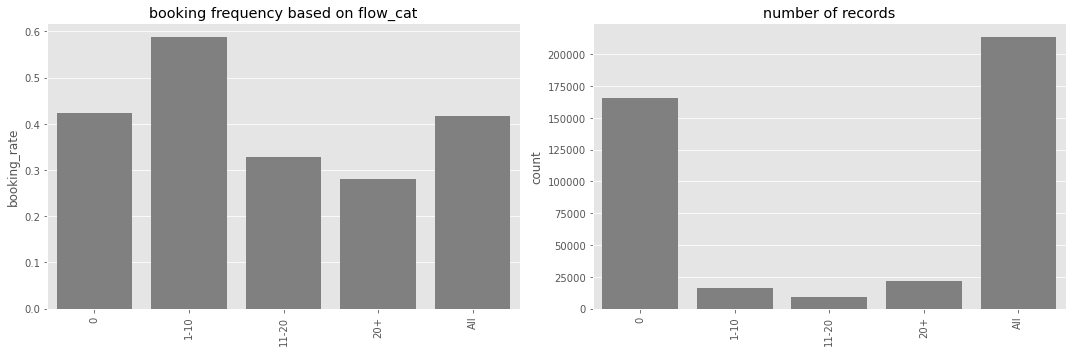

In [37]:
visual_plot('flow_cat')

### Gender

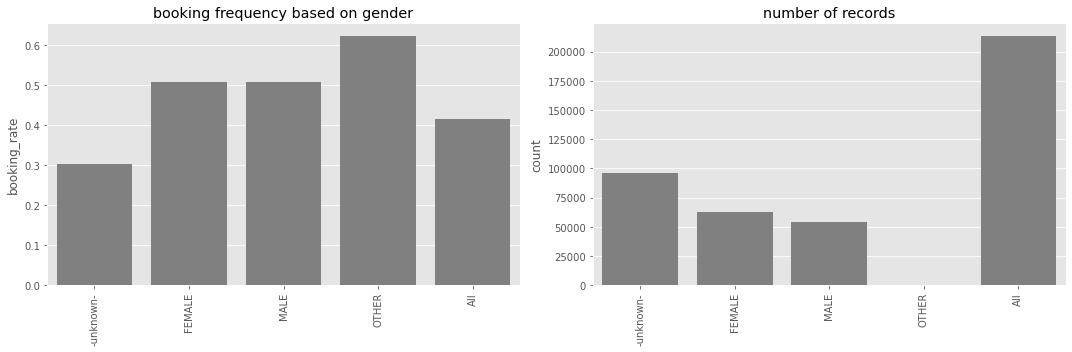

In [38]:
visual_plot('gender')

**Observation**: Male and Female booking rate is almost identical. When users didn't specific gender, they are two times more likely to just browsing, which is quite a powerful feature. We will consolidate this features to be a binary variable "gender_stated", 0 is unknown, 1 being otherwise.

In [39]:
train['gender'].value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [40]:
train['gender_stated'] = train['gender'].apply(
    lambda x: 'no' if x == '-unknown-' else 'yes')

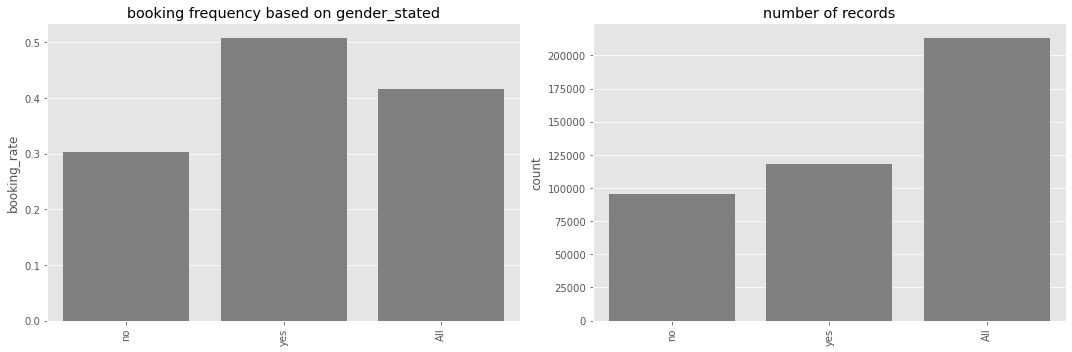

In [41]:
visual_plot('gender_stated')

### Affiliate

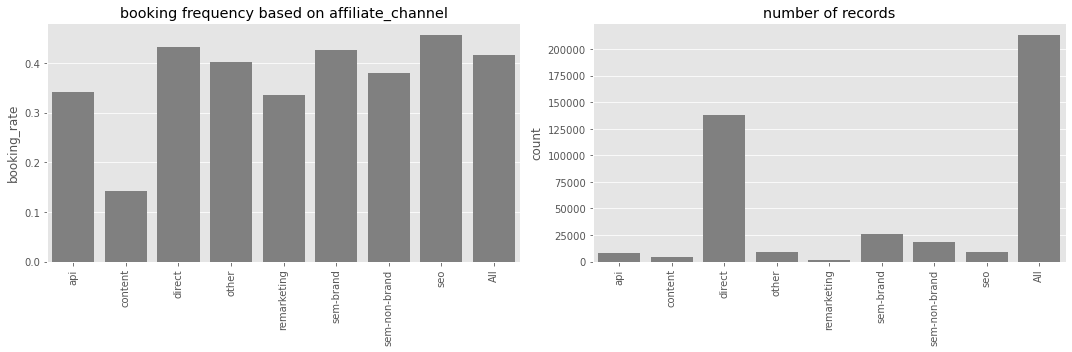

In [42]:
visual_plot('affiliate_channel')

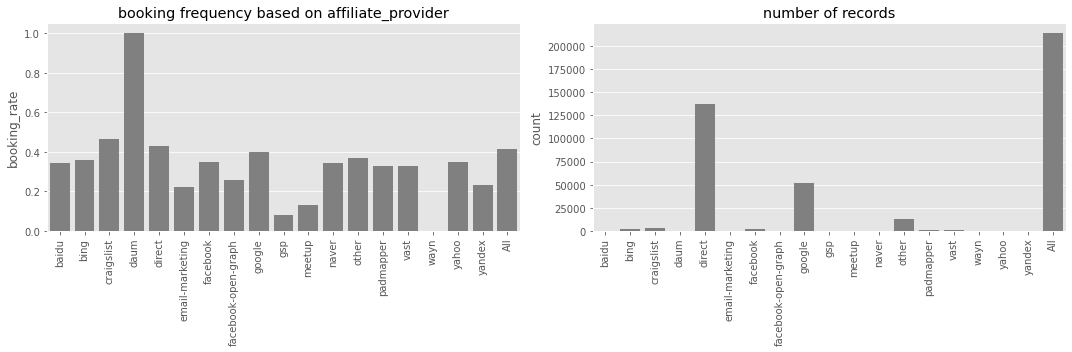

In [43]:
visual_plot('affiliate_provider')

**Observation**: From the affiliate standpoint, craigslist appear to have higher booking rate than the others, followed by direct, then major search engines such as google and bing.

We will consolidate the provider by keeping the major ones such as google, bing, facebook, and yahoo. Other provider will fall under 'other'

In [44]:
provider = {'direct': 'direct', 'google': 'google', 'facebook': 'facebook',
            'facebook-open-graph': 'facebook', 'bing': 'bing', 'yahoo': 'yahoo', 'craigslist': 'craigslist'}

In [45]:
train['provider'] = train['affiliate_provider'].map(provider).fillna('other')

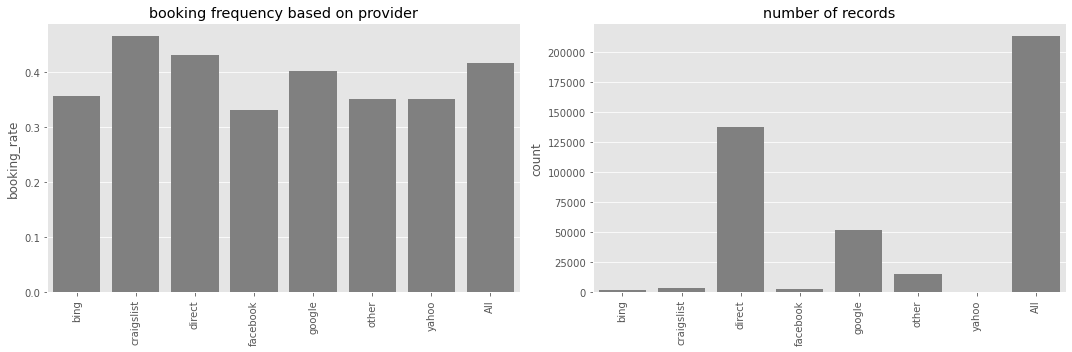

In [46]:
visual_plot('provider')

### Session Data Review

We completed the features for the train dataset, we now move on to the session dataset

In [47]:
# obtain a copy of the browsing session and whether booking happened
id_book = train[['id', 'book']]

In [48]:
session_bk = pd.merge(session, id_book, left_on='user_id',
                      right_on='id', how='inner')

In [49]:
session_bk.to_csv('./data/id_book.csv', index=False)

#### Section times

In [50]:
sec_time = session_bk.groupby(['user_id', 'book']).agg(
    {'secs_elapsed': 'sum'}).reset_index()

In [51]:
sec_time['sec_log'] = sec_time['secs_elapsed'].apply(
    np.log).replace(-np.inf, 0)
# sec_time['sec_log'] = sec_time['sec_log'].replace()

In [52]:
sec_time['sec_log'].describe()

count    73815.000000
mean        13.001341
std          2.643242
min          0.000000
25%         12.456522
50%         13.679533
75%         14.530168
max         17.458905
Name: sec_log, dtype: float64

In [53]:
booked = sec_time.query('book == 1')
dropped = sec_time.query('book == 0')

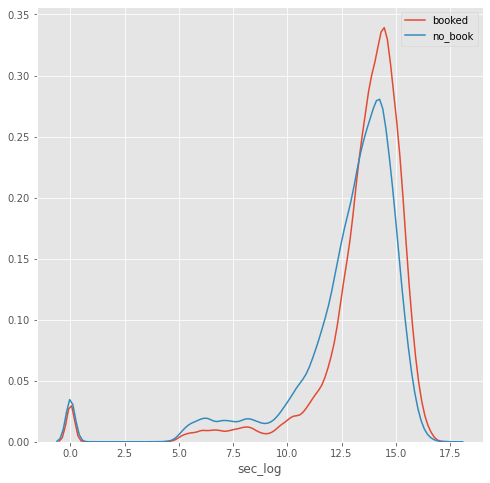

In [54]:
plt.figure(figsize=(8, 8))
sns.distplot(booked['sec_log'], label='booked', hist=False)
sns.distplot(dropped['sec_log'], label='no_book', hist=False)
plt.legend(loc='best')
plt.show()

**Observation**: Overall, longer section time will more likely to result in booking. Unfortunately, there isn't a clear cut on the time range since there are enough long sections that do not result in booking, which could represent user browsing during destination research.

In [55]:
session_bk.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed,id,book
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0,d1mm9tcy42,1
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0,d1mm9tcy42,1
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0,d1mm9tcy42,1
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0,d1mm9tcy42,1
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0,d1mm9tcy42,1


### Last action

We will assume here that the order of the action item within the session dataset is sequential, in which the last row by each user_id is the last action performed by the users before users book or drop from the session. We will create a dataframe to capture that.

In [56]:
last_action = session_bk.groupby(['user_id']).tail(1)

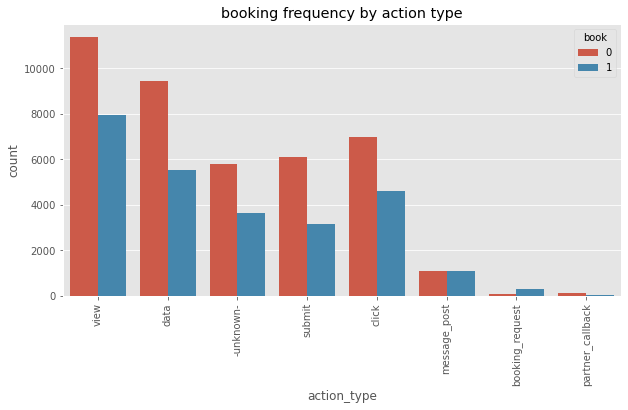

In [57]:
plt.figure(figsize=(10, 5))
sns.countplot(x='action_type', hue='book', data=last_action)
plt.title('booking frequency by action type')
plt.xticks(rotation=90)
plt.show()

Each type of the action has different booking rate, we will treat that as an feature.

It turns out there are a lot of categorical among action detail and action, and make it difficult to assess through visualization. We will apply chi-squared test to all variables that cannot be assessed visually.

## Statistical Test

**Null (H0)**: variables being tested do not affect booking rate
<br>
**Alternate (H1)**: variables being tested affect booking rate

In [58]:
from scipy.stats import chi2, chi2_contingency

In [59]:
def chi_square(var, df):
    table = pd.crosstab(df[var], df['book'], margins=True)
    stat, p, dof, expected = chi2_contingency(table[[0, 1]])
    print('chi_statistic: {:.3f}'.format(stat))
    print('p-value: {:.2f}'.format(p))
    print('degree of freedom: {:.0f}'.format(dof))
#     print('expected freq: \n {}'.format(pd.DataFrame(expected, index=table.index)))

In [60]:
chi_square('provider', train)

chi_statistic: 595.192
p-value: 0.00
degree of freedom: 7


In [61]:
chi_square('affiliate_channel', train)

chi_statistic: 1755.865
p-value: 0.00
degree of freedom: 8


In [62]:
chi_square('signup_app', train)

chi_statistic: 2558.628
p-value: 0.00
degree of freedom: 4


In [63]:
chi_square('signup_method', train)

chi_statistic: 275.864
p-value: 0.00
degree of freedom: 3


In [64]:
chi_square('flow_cat', train)

chi_statistic: 3942.275
p-value: 0.00
degree of freedom: 4


In [65]:
chi_square('action_type', last_action)

chi_statistic: 566.097
p-value: 0.00
degree of freedom: 8


### Predictive Power Score

It is another way to look at how predictive the categorical variables are to the target and to other variables

In [66]:
keep_col = ['country_destination', 'age_gp', 'lang', 'browser', 'flow_cat', 
            'provider', 'affiliate_channel', 'signup_method', 'signup_app']

In [67]:
pps_df = train[keep_col]

In [68]:
matrix = pps.matrix(pps_df, output='df')

In [69]:
def heatmap(df):
    df = df[['x', 'y', 'ppscore']].pivot(
        columns='x', index='y', values='ppscore')
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues",
                     linewidths=0.5, annot=True)
    ax.set_title("PPS matrix")
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    return ax

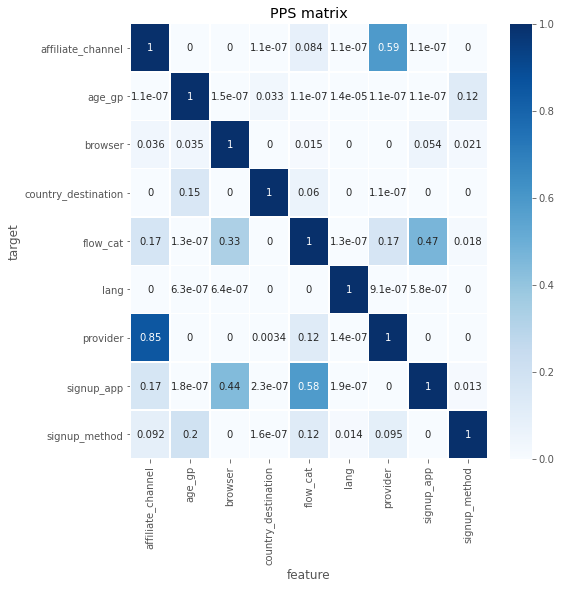

In [70]:
plt.figure(figsize=(8,8))
heatmap(matrix)
plt.show()

We see that affiliate_channel has high predictive power for provider, so by keeping affiliate_channel may already capture the predictive power of provider. We will drop provider from the feature set.

## Destination

Above assessment focus on whether a booking will occur. The final target variable is destination which is the second part of the prediction model. We will repeat the assessment with a handful of selected features under to understand feature dependences.

In [71]:
# check to ensure that all missing first book are under NDF
train[train['date_first_booking'].isna()]['country_destination'].value_counts()

NDF    124543
Name: country_destination, dtype: int64

In [72]:
train['country_destination'].value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

In general, ~50% of the activities won't lead to a booking. US is still the most visited destination, followed by France.

In [73]:
dest = train.loc[~train['date_first_booking'].isna()]

In [74]:
def table_plot(var, df):
    plot_df = df.groupby([var, 'country_destination']).size().reset_index()
    plot_pivot = plot_df.pivot(
        columns='country_destination', index=var, values=0)
    stack_bar = plot_pivot.fillna(0).apply(lambda x: x*100/sum(x), axis=1)
    return stack_bar

### Browser

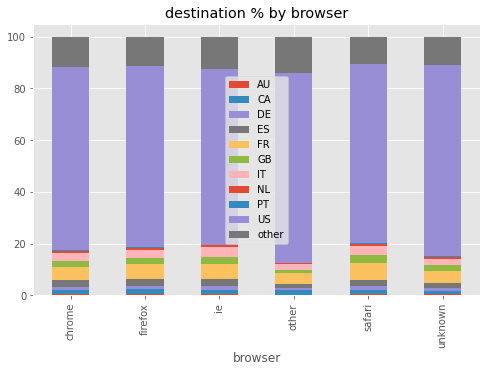

In [75]:
browser = table_plot('browser', dest)
browser.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('destination % by browser')
plt.legend(loc='center')
plt.show()

**Observation**: Users who use major browsers such as chrome, firefox, and safari have the same likelihood to book a trip with in US. Other/unknown has even more higher percentage.

### Age Group

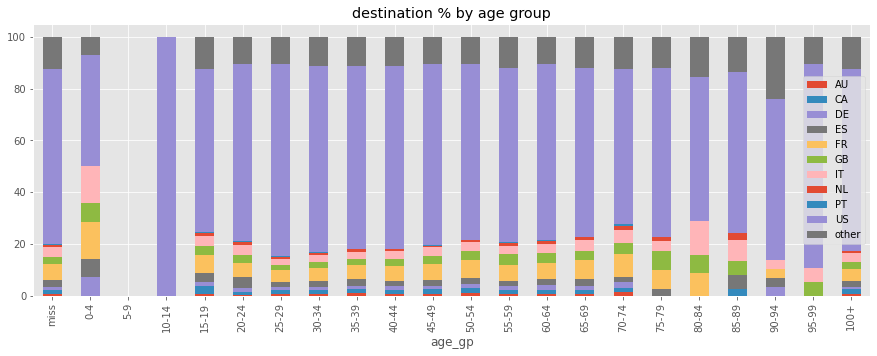

In [76]:
age_gp = table_plot('age_gp', dest)
age_gp.plot(kind='bar', stacked=True, figsize=(15, 5))
plt.title('destination % by age group')
plt.legend(loc='best')
plt.show()

**Observation**: 10-14 age group has US only as the destination. Age 80-84 and 90-99 groups have fewer destination variations than others.

### Language

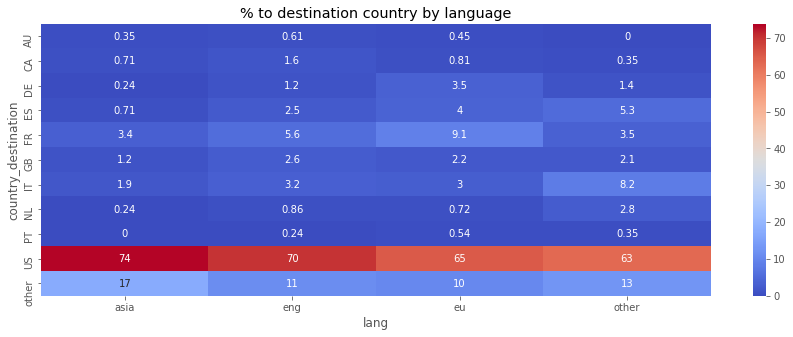

In [77]:
lang = table_plot('lang', dest)
plt.figure(figsize=(15, 5))
sns.heatmap(lang.transpose(), cmap='coolwarm', annot=True)
plt.title('% to destination country by language')
plt.show()

**Observation**: Despite highly imbalance data, eng platform still have the highest probability of booking a destination (mostly within US). European languages platform show slightly higher booking to France. 

### Summary:

- Almost all variables being tested had some influence on the booking rate.
- We will also drop affiliate provider due to potential high collinearity to affiliate channel (based on the predictive power score).
- We won't use the elapsed time feature since the distribution between booking and no booking has significant overlap.
- the combination of action, action type, and action detail will likely to have more predictive power to booking, which we leverage machine learning algorithms to test.
- new features created are age group, language group, and higher level browser category.
- for session dataset, we will focus on last action in the user's browsing sequence.

### [Return to README](https://github.com/sittingman/airbnb_booking/blob/master/README.md)